# Skeleton Code
To let you focus on the details of the algorithm, a skeleton code is provided to help you get started, and to allow you to test your algorithm on your own. The skeleton code includes the following files. Note that you will only be working in one of them, and the rest of them are read-only:

* Read-only: GameManager.py. This is the driver program that loads your Computer AI and Player AI, and begins a game where they compete with each other. See below on how to execute this program.

* Read-only: Grid.py. This module defines the Grid object, along with some useful operations: move(), getAvailableCells(), insertTile(), and clone(), which you may use in your code. These are available to get you started, but they are by no means the most efficient methods available. If you wish to strive for better performance, feel free to ignore these and write your own helper methods in a separate file.

* Read-only: BaseAI.py. This is the base class for any AI component. All AIs inherit from this module, and implement the getMove() function, which takes a Grid object as parameter and returns a move (there are different "moves" for different AIs).

* Read-only: ComputerAI.py. This inherits from BaseAI. The getMove() function returns a computer action that is a tuple (x, y) indicating the place you want to place a tile.

* Writable: PlayerAI.py. You will create this file, and this is where you will be doing your work. This should inherit from BaseAI. The getMove() function, which you will need to implement, returns a number that indicates the player’s action. In particular, 0 stands for "Up", 1 stands for "Down", 2 stands for "Left", and 3 stands for "Right". You need to create this file and make it as intelligent as possible. You may include other files in your submission, but they will have to be included through this file.

* Read-only: BaseDisplayer.py and Displayer.py. These print the grid.

# What you need to submit


Your job in this assignment is to write PlayerAI.py, which intelligently plays the 2048-puzzle game. Here is a snippet of starter code to allow you to observe how the game looks when it is played out. In the following "naive" Player AI. The getMove() function simply selects a next move in random out of the available moves: <br>

from random import randint<br>

from BaseAI import BaseAI<br>

 

class PlayerAI(BaseAI):<br>

def getMove(self, grid):<br>

moves = grid.getAvailableMoves()<br>

return moves[randint(0, len(moves) - 1)] if moves else None<br>

Of course, that is indeed a very naive way to play the 2048-puzzle game. If you submit this as your finished product, you will likely receive a grade of zero. You should implement your Player AI with the following points in mind:<br>

* Employ the minimax algorithm. This is a requirement. There are many viable strategies to beat the 2048-puzzle game, but in this assignment we will be practicing with the minimax algorithm.

* Implement alpha-beta pruning. This is a requirement. This should speed up the search process by eliminating irrelevant branches. In this case, is there anything we can do about move ordering?
* Use heuristic functions. What is the maximum height of the game tree? Unlike elementary games like tic-tac-toe, in this game it is highly impracticable to search the entire depth of the theoretical game tree. To be able to cut off your search at any point, you must employ heuristic functions to allow you to assign approximate values to nodes in the tree. Remember, the time limit allowed for each move is 0.2 seconds, so you must implement a systematic way to cut off your search before time runs out.

* Assign heuristic weights. You will likely want to include more than one heuristic function. In that case, you will need to assign weights associated with each individual heuristic. Deciding on an appropriate set of weights will take careful reasoning, along with careful experimentation. If you feel adventurous, you can also simply write an optimization meta-algorithm to iterate over the space of weight vectors, until you arrive at results that you are happy enough with.

# Description

With typical board games like chess, the two players in the game (i.e. the "Computer AI" and the "Player") take similar actions in their turn, and have similar objectives to achieve in the game. In the 2048-puzzle game, the setup is inherently asymmetric; that is, the computer and player take drastically different actions in their turns. Specifically, the computer is responsible for placing random tiles of 2 or 4 on the board, while the player is responsible for moving the pieces. However, adversarial search can be applied to this game just the same.

In [3]:
from IPython.display import Image

In [4]:
class BaseAI:
    def getMove(self, grid):
        pass

In [5]:
class BaseDisplayer:
    def __init__(self):
        pass

    def display(self, grid):
        pass

In [6]:
from copy import deepcopy

directionVectors = (UP_VEC, DOWN_VEC, LEFT_VEC, RIGHT_VEC) = ((-1, 0), (1, 0), (0, -1), (0, 1))
vecIndex = [UP, DOWN, LEFT, RIGHT] = range(4)

class Grid:
    def __init__(self, size = 4):
        self.size = size
        self.map = [[0] * self.size for i in range(self.size)]

    # Make a Deep Copy of This Object
    def clone(self):
        gridCopy = Grid()
        gridCopy.map = deepcopy(self.map)
        gridCopy.size = self.size

        return gridCopy

    # Insert a Tile in an Empty Cell
    def insertTile(self, pos, value):
        self.setCellValue(pos, value)

    def setCellValue(self, pos, value):
        self.map[pos[0]][pos[1]] = value

    # Return All the Empty c\Cells
    def getAvailableCells(self):
        cells = []

        for x in range(self.size):
            for y in range(self.size):
                if self.map[x][y] == 0:
                    cells.append((x,y))

        return cells

    # Return the Tile with Maximum Value
    def getMaxTile(self):
        maxTile = 0

        for x in range(self.size):
            for y in range(self.size):
                maxTile = max(maxTile, self.map[x][y])

        return maxTile

    # Check If Able to Insert a Tile in Position
    def canInsert(self, pos):
        return self.getCellValue(pos) == 0

    # Move the Grid
    def move(self, dir):
        dir = int(dir)

        if dir == UP:
            return self.moveUD(False)
        if dir == DOWN:
            return self.moveUD(True)
        if dir == LEFT:
            return self.moveLR(False)
        if dir == RIGHT:
            return self.moveLR(True)

    # Move Up or Down
    def moveUD(self, down):
        r = range(self.size -1, -1, -1) if down else range(self.size)

        moved = False

        for j in range(self.size):
            cells = []

            for i in r:
                cell = self.map[i][j]

                if cell != 0:
                    cells.append(cell)

            self.merge(cells)

            for i in r:
                value = cells.pop(0) if cells else 0

                if self.map[i][j] != value:
                    moved = True

                self.map[i][j] = value

        return moved

    # move left or right
    def moveLR(self, right):
        r = range(self.size - 1, -1, -1) if right else range(self.size)

        moved = False

        for i in range(self.size):
            cells = []

            for j in r:
                cell = self.map[i][j]

                if cell != 0:
                    cells.append(cell)

            self.merge(cells)

            for j in r:
                value = cells.pop(0) if cells else 0

                if self.map[i][j] != value:
                    moved = True

                self.map[i][j] = value

        return moved

    # Merge Tiles
    def merge(self, cells):
        if len(cells) <= 1:
            return cells

        i = 0

        while i < len(cells) - 1:
            if cells[i] == cells[i+1]:
                cells[i] *= 2

                del cells[i+1]

            i += 1

    def canMove(self, dirs = vecIndex):

        # Init Moves to be Checked
        checkingMoves = set(dirs)

        for x in range(self.size):
            for y in range(self.size):

                # If Current Cell is Filled
                if self.map[x][y]:

                    # Look Ajacent Cell Value
                    for i in checkingMoves:
                        move = directionVectors[i]

                        adjCellValue = self.getCellValue((x + move[0], y + move[1]))

                        # If Value is the Same or Adjacent Cell is Empty
                        if adjCellValue == self.map[x][y] or adjCellValue == 0:
                            return True

                # Else if Current Cell is Empty
                elif self.map[x][y] == 0:
                    return True

        return False

    # Return All Available Moves
    def getAvailableMoves(self, dirs = vecIndex):
        availableMoves = []

        for x in dirs:
            gridCopy = self.clone()

            if gridCopy.move(x):
                availableMoves.append(x)

        return availableMoves

    def crossBound(self, pos):
        return pos[0] < 0 or pos[0] >= self.size or pos[1] < 0 or pos[1] >= self.size

    def getCellValue(self, pos):
        if not self.crossBound(pos):
            return self.map[pos[0]][pos[1]]
        else:
            return None

if __name__ == '__main__':
    g = Grid()
    g.map[0][0] = 2
    g.map[1][0] = 2
    g.map[3][0] = 4

    while True:
        for i in g.map:
            print(i)

        print(g.getAvailableMoves())

        v = input()

        g.move(v)

[2, 0, 0, 0]
[2, 0, 0, 0]
[0, 0, 0, 0]
[4, 0, 0, 0]
[0, 1, 3]



ValueError: invalid literal for int() with base 10: ''

In [7]:
from random import randint
#from BaseAI import BaseAI

class ComputerAI(BaseAI):
    def getMove(self, grid):
        cells = grid.getAvailableCells()

        return cells[randint(0, len(cells) - 1)] if cells else None

In [8]:
#from BaseDisplayer import BaseDisplayer
import platform
import os

colorMap = {
    0 	  : 97 ,
    2     : 40 ,
    4     : 100,
    8     : 47 ,
    16    : 107,
    32    : 46 ,
    64    : 106,
    128   : 44 ,
    256   : 104,
    512   : 42 ,
    1024  : 102,
    2048  : 43 ,
    4096  : 103,
    8192  : 45 ,
    16384 : 105,
    32768 : 41 ,
    65536 : 101,
}

cTemp = "\x1b[%dm%7s\x1b[0m "

class Displayer(BaseDisplayer):
    def __init__(self):
        if "Windows" == platform.system():
            self.display = self.winDisplay
        else:
            self.display = self.unixDisplay

    def display(self, grid):
        pass

    def winDisplay(self, grid):
        for i in range(grid.size):
            for j in range(grid.size):
                print("%6d  " % grid.map[i][j], end="")
            print("")
        print("")

    def unixDisplay(self, grid):
        for i in range(3 * grid.size):
            for j in range(grid.size):
                v = grid.map[int(i / 3)][j]

                if i % 3 == 1:
                    string = str(v).center(7, " ")
                else:
                    string = " "

                print(cTemp %  (colorMap[v], string), end="")
            print("")

            if i % 3 == 2:
                print("")

In [102]:
#from Grid       import Grid
#from ComputerAI import ComputerAI
#from PlayerAI   import PlayerAI
#from Displayer  import Displayer
from random       import randint
import time

defaultInitialTiles = 2
defaultProbability = 0.9

actionDic = {
    0: "UP",
    1: "DOWN",
    2: "LEFT",
    3: "RIGHT"
}

(PLAYER_TURN, COMPUTER_TURN) = (0, 1)

# Time Limit Before Losing
timeLimit = 0.2
allowance = 0.05

class GameManager:
    def __init__(self, size = 4):
        self.grid = Grid(size)
        self.possibleNewTiles = [2, 4]
        self.probability = defaultProbability
        self.initTiles  = defaultInitialTiles
        self.computerAI = None
        self.playerAI   = None
        self.displayer  = None
        self.over       = False

    def setComputerAI(self, computerAI):
        self.computerAI = computerAI

    def setPlayerAI(self, playerAI):
        self.playerAI = playerAI

    def setDisplayer(self, displayer):
        self.displayer = displayer

    def updateAlarm(self, currTime):
        if currTime - self.prevTime > timeLimit + allowance:
            self.over = True
        else:
            while time.process_time() - self.prevTime < timeLimit + allowance:
                pass

            self.prevTime = time.process_time()

    def start(self):
        for i in range(self.initTiles):
            self.insertRandonTile()

        self.displayer.display(self.grid)

        # Player AI Goes First
        turn = PLAYER_TURN
        maxTile = 0

        self.prevTime = time.process_time()

        while not self.isGameOver() and not self.over:
            # Copy to Ensure AI Cannot Change the Real Grid to Cheat
            gridCopy = self.grid.clone()

            move = None

            if turn == PLAYER_TURN:
                print("Player's Turn:", end="")
                move = self.playerAI.getMove(gridCopy)
                print(actionDic[move])

                # Validate Move
                if move != None and move >= 0 and move < 4:
                    if self.grid.canMove([move]):
                        self.grid.move(move)

                        # Update maxTile
                        maxTile = self.grid.getMaxTile()
                    else:
                        print("Invalid PlayerAI Move")
                        self.over = True
                else:
                    print("Invalid PlayerAI Move - 1")
                    self.over = True
            else:
                print("Computer's turn:")
                move = self.computerAI.getMove(gridCopy)

                # Validate Move
                if move and self.grid.canInsert(move):
                    self.grid.setCellValue(move, self.getNewTileValue())
                else:
                    print("Invalid Computer AI Move")
                    self.over = True

            if not self.over:
                self.displayer.display(self.grid)

            # Exceeding the Time Allotted for Any Turn Terminates the Game
            self.updateAlarm(time.process_time())

            turn = 1 - turn
        print(maxTile)

    def isGameOver(self):
        return not self.grid.canMove()

    def getNewTileValue(self):
        if randint(0,99) < 100 * self.probability:
            return self.possibleNewTiles[0]
        else:
            return self.possibleNewTiles[1];

    def insertRandonTile(self):
        tileValue = self.getNewTileValue()
        cells = self.grid.getAvailableCells()
        cell = cells[randint(0, len(cells) - 1)]
        self.grid.setCellValue(cell, tileValue)

def main():
    gameManager = GameManager()
    playerAI  	= PlayerAI()
    computerAI  = ComputerAI()
    displayer 	= Displayer()

    gameManager.setDisplayer(displayer)
    gameManager.setPlayerAI(playerAI)
    gameManager.setComputerAI(computerAI)

    gameManager.start()

if __name__ == '__main__':
    main()

                                
   0       0       0       0    
                                

                                
   4       2       0       0    
                                

                                
   0       0       0       0    
                                

                                
   0       0       0       0    
                                

Player's Turn:Max::grid [[0, 0, 0, 0], [4, 2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Max::child [[4, 2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::grid [[4, 2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::child [[4, 2, 2, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Max::grid [[4, 2, 2, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Max::child [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [4, 2, 2, 0]]
Min::grid [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [4, 2, 2, 0]]
Min::child [[2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [4, 2, 2, 0]]
Max::grid [[2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 

Max::child [[4, 8, 4, 0], [32, 4, 32, 8], [8, 64, 8, 2], [2, 8, 8, 0]]
Max::grid [[4, 8, 2, 2], [32, 4, 32, 4], [8, 64, 8, 4], [2, 8, 4, 2]]
Max::child [[4, 8, 2, 0], [32, 4, 32, 2], [8, 64, 8, 8], [2, 8, 4, 2]]
Max::grid [[4, 8, 2, 2], [32, 4, 32, 4], [8, 64, 8, 4], [2, 8, 4, 2]]
Max::child [[4, 8, 4, 0], [32, 4, 32, 4], [8, 64, 8, 4], [2, 8, 4, 2]]
Max::grid [[4, 8, 2, 2], [32, 4, 32, 4], [8, 64, 8, 4], [2, 8, 4, 2]]
Max::child [[0, 4, 8, 4], [32, 4, 32, 4], [8, 64, 8, 4], [2, 8, 4, 2]]
Min::grid [[4, 8, 2, 2], [32, 4, 32, 4], [8, 64, 8, 4], [2, 8, 4, 0]]
Min::child [[4, 8, 2, 2], [32, 4, 32, 4], [8, 64, 8, 4], [2, 8, 4, 4]]
Max::grid [[4, 8, 2, 2], [32, 4, 32, 4], [8, 64, 8, 2], [2, 8, 4, 2]]
Max::child [[4, 8, 2, 0], [32, 4, 32, 2], [8, 64, 8, 4], [2, 8, 4, 4]]
Max::grid [[4, 8, 2, 2], [32, 4, 32, 4], [8, 64, 8, 2], [2, 8, 4, 2]]
Max::child [[4, 8, 4, 0], [32, 4, 32, 4], [8, 64, 8, 2], [2, 8, 4, 2]]
Max::grid [[4, 8, 2, 2], [32, 4, 32, 4], [8, 64, 8, 2], [2, 8, 4, 2]]
Max::child [[

Min::child [[2, 4, 0, 0], [4, 2, 8, 8], [8, 8, 4, 4], [2, 4, 2, 2]]
Min::grid [[2, 0, 0, 0], [4, 2, 8, 8], [8, 8, 4, 4], [2, 4, 2, 2]]
Min::child [[2, 0, 2, 0], [4, 2, 8, 8], [8, 8, 4, 4], [2, 4, 2, 2]]
Min::grid [[2, 0, 0, 0], [4, 2, 8, 8], [8, 8, 4, 4], [2, 4, 2, 2]]
Min::child [[2, 0, 4, 0], [4, 2, 8, 8], [8, 8, 4, 4], [2, 4, 2, 2]]
Min::grid [[2, 0, 0, 0], [4, 2, 8, 8], [8, 8, 4, 4], [2, 4, 2, 2]]
Min::child [[2, 0, 0, 2], [4, 2, 8, 8], [8, 8, 4, 4], [2, 4, 2, 2]]
Min::grid [[2, 0, 0, 0], [4, 2, 8, 8], [8, 8, 4, 4], [2, 4, 2, 2]]
Min::child [[2, 0, 0, 4], [4, 2, 8, 8], [8, 8, 4, 4], [2, 4, 2, 2]]
Max::grid [[2, 2, 8, 8], [4, 8, 4, 4], [8, 4, 2, 2], [2, 0, 0, 0]]
Max::child [[4, 16, 0, 0], [4, 8, 8, 0], [8, 4, 4, 0], [2, 0, 0, 0]]
Max::grid [[2, 2, 8, 8], [4, 8, 4, 4], [8, 4, 2, 2], [2, 0, 0, 0]]
Max::child [[0, 0, 4, 16], [0, 4, 8, 8], [0, 8, 4, 4], [0, 0, 0, 2]]
Min::grid [[2, 2, 8, 8], [4, 8, 4, 4], [8, 4, 2, 0], [2, 0, 0, 0]]
Min::child [[2, 2, 8, 8], [4, 8, 4, 4], [8, 4, 2, 4],

Min::child [[2, 2, 2, 0], [4, 0, 0, 4], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::grid [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::child [[2, 2, 2, 0], [4, 0, 0, 0], [2, 0, 0, 0], [0, 0, 0, 0]]
Min::grid [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::child [[2, 2, 2, 0], [4, 0, 0, 0], [4, 0, 0, 0], [0, 0, 0, 0]]
Min::grid [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::child [[2, 2, 2, 0], [4, 0, 0, 0], [0, 2, 0, 0], [0, 0, 0, 0]]
Min::grid [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::child [[2, 2, 2, 0], [4, 0, 0, 0], [0, 4, 0, 0], [0, 0, 0, 0]]
Min::grid [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::child [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 2, 0], [0, 0, 0, 0]]
Min::grid [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::child [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 4, 0], [0, 0, 0, 0]]
Min::grid [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Min::child [[2, 2, 2, 0], [4, 0, 0, 0], [0, 0, 0, 2], [

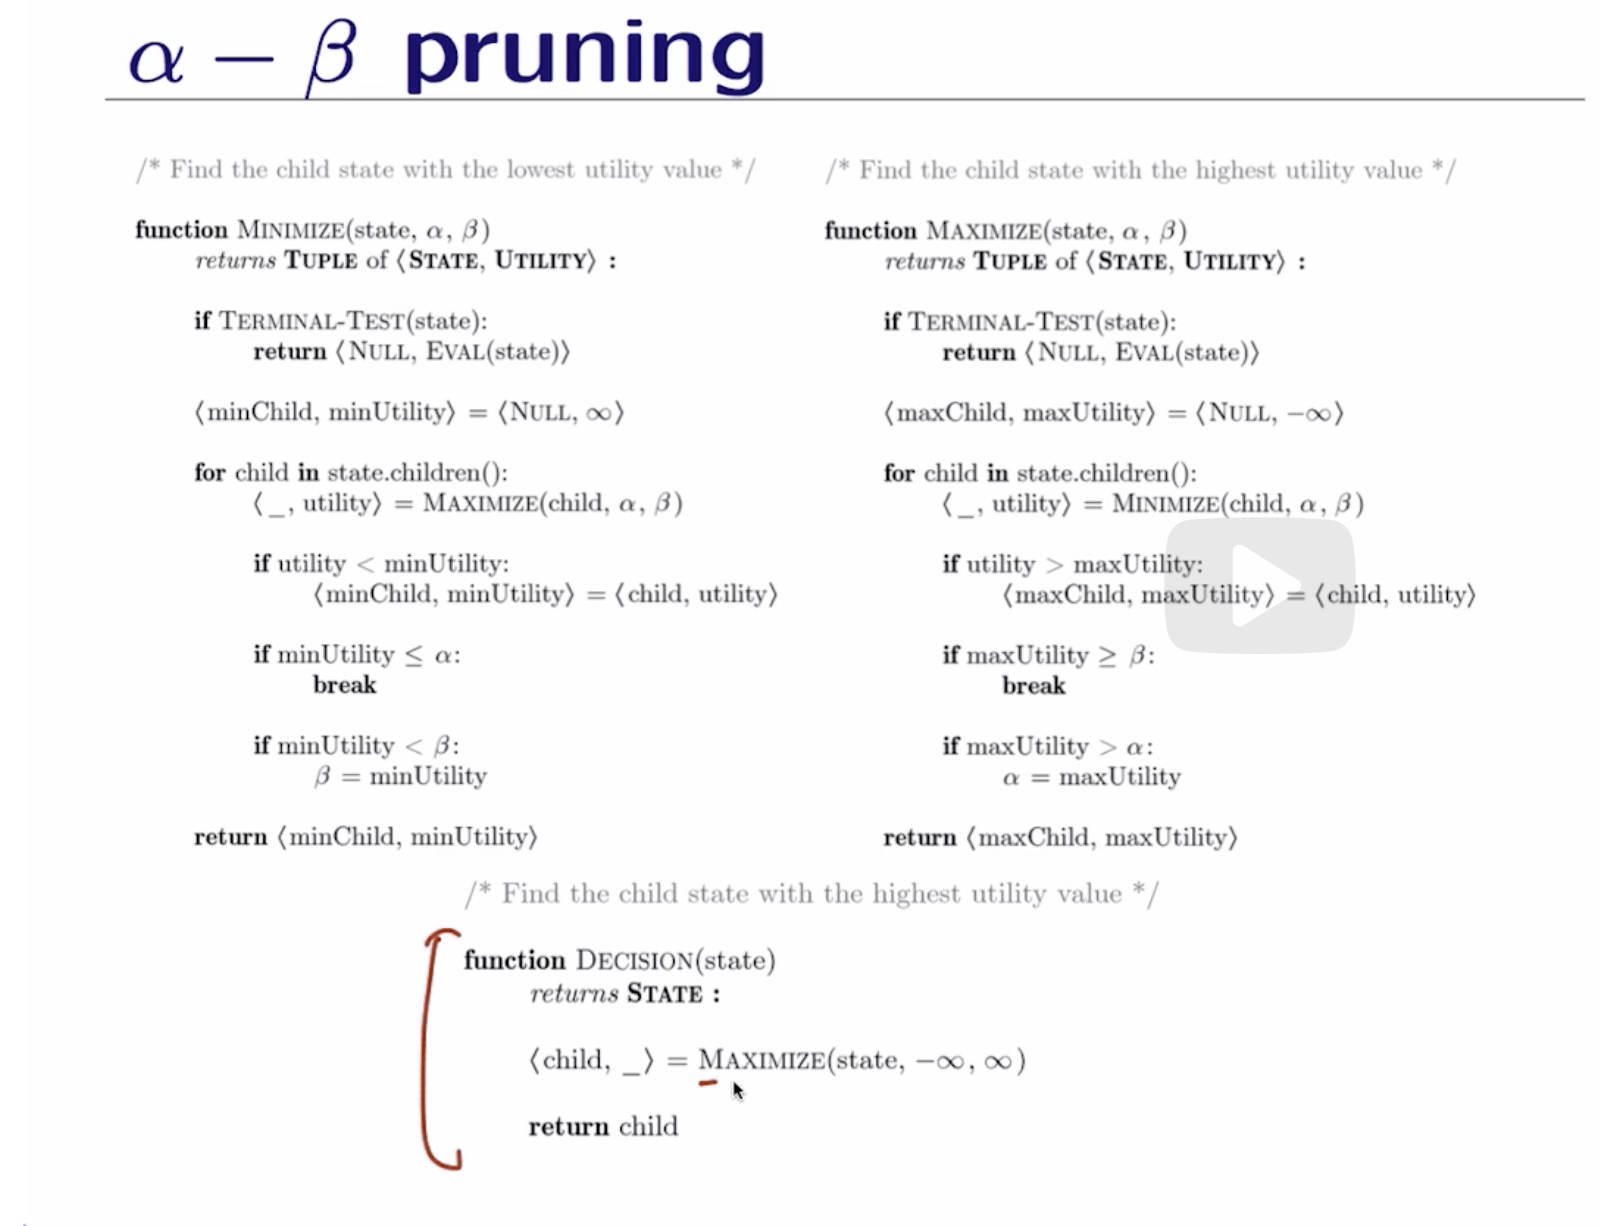

In [11]:
Image("img/MinMaxAlphaBetaPruning.png")

In [103]:
from random import randint
import time
import math
#from BaseAI import BaseAI

class PlayerAI(BaseAI):

    def getMove(self, grid):
        start_time = time.process_time()
        move = self.decision(grid, start_time)
        return move
    
    def decision(self, grid, start_time):
        (move, _, _) = self.maximize(grid, -math.inf, math.inf, start_time, 0)
        return move

    def heuristic(self, grid):
        num_empty_squares = 0
        edge_sum = 0
        num_same_val = 0
        dif_adgc_sum = 0
        biggest_val = 0
        for x in range(0,grid.size):
            for y in range(0,grid.size):
                currentValue = grid.map[x][y]
                endIdx = [0, grid.size-1]
                if currentValue == 0:
                    num_empty_squares+=1
                else:
                    currentValue_log = math.log(currentValue,2)
                    if x in endIdx or y in endIdx:
                        edge_sum+=currentValue_log
                    if x+1 <= grid.size-1:
                        nextValue = grid.map[x+1][y]
                        num_same_val += 1 if currentValue == nextValue else 0
                        dif_adgc_sum += abs(math.log(nextValue,2) - currentValue_log) if nextValue!=0 else currentValue_log
                    if y+1 <= grid.size-1:
                        nextValue = grid.map[x][y+1]
                        num_same_val += 1 if currentValue == nextValue else 0
                        dif_adgc_sum += abs(math.log(nextValue,2) - currentValue_log) if nextValue!=0 else currentValue_log
                    if currentValue_log > biggest_val:
                        biggest_val = currentValue_log
        
        #Forth submission
        #h = num_empty_squares * biggest_val * 1.8 + num_same_val * biggest_val * 2  + edge_sum * 1.2 + dif_adgc_sum * -1
        #h = num_empty_squares * biggest_val * 1.5 + num_same_val * biggest_val * 2  + edge_sum * 1.2 + dif_adgc_sum * -1.5 #512 1024
        # h = num_empty_squares * biggest_val * 1 + num_same_val * biggest_val * 0.8  + edge_sum * 1 + dif_adgc_sum * -0.5 # 1024
        #h = num_empty_squares * biggest_val * 1 + num_same_val * biggest_val * 0.8  + edge_sum * 1 + dif_adgc_sum * -0.8 # 93 分
        h = num_empty_squares * biggest_val * 1 + num_same_val * biggest_val * 1.2  + edge_sum * 1 + dif_adgc_sum * -0.8
        return h
    
    def maximize(self, grid, alpha, beta, start_time,depth):
        timeLimit = 0.15
        maxDepth = 5

        depth+=1
        if time.process_time() - start_time > timeLimit or not grid.getAvailableMoves() or depth >= maxDepth:
            return None, None, self.heuristic(grid)
    
        (maxChild, maxUtility) = (None, -math.inf)
        bestmove = 0
        for move in grid.getAvailableMoves():
            child = grid.clone()
            child.move(move)        
            (_,utility) = self.minimize(child, alpha, beta, start_time,depth)        
            if utility > maxUtility:
                (maxChild, maxUtility) = (child, utility)  
                bestmove = move
                if maxUtility >= beta:
                    break
                if maxUtility > alpha:
                    alpha = maxUtility
        
        return bestmove, maxChild, maxUtility
    
    def minimize(self, grid, alpha, beta, start_time,depth):
        timeLimit = 0.10
        maxDepth = 5
        depth+=1
        
        if time.process_time() - start_time > timeLimit or not grid.getAvailableCells() or depth >= maxDepth:
            return None, self.heuristic(grid)

        (minChild, minUtility) = (None, math.inf)

        for move in grid.getAvailableCells():
            for val in [2,4]:
                child = grid.clone();      
                child.setCellValue(move,val)
                (_,_,utility) = self.maximize(child, alpha, beta, start_time,depth)        
                if utility < minUtility:
                    (minChild, minUtility) = (child, utility)            
                    if minUtility <= alpha:
                        break
                    if minUtility < beta:
                        beta = minUtility
        return minChild, minUtility

In [188]:
# Calculate heuristic value using list comprehension
### Calculate the number of empty squares
# num_empty_squares = sum([1 for row in grid.map for item in row if item==0])
### item sum 
#item_sum = sum([math.log(item,2) for row in grid.map for item in row if item!=0])
### Calculate the sum of values in the edge
#edge_sum = sum(math.log(grid.map[x][y],2) for x in [0,grid.size-1] for y in [0,grid.size-1] if grid.map[x][y]!=0)
#row_corner_sum = sum(math.log(grid.map[x][y],2) for x in [0,grid.size-1] for y in range(0,grid.size) if grid.map[x][y]!=0)
#col_corner_sum = sum(math.log(grid.map[x][y],2) for x in range(0,grid.size) for y in [0,grid.size-1] if grid.map[x][y]!=0)
### Calculate the number of adjancent equal values
#num_of_same_value_row = sum(1 for x in range(0,grid.size) for y in range(0,grid.size-1) if grid.map[x][y]==grid.map[x][y+1] and grid.map[x][y]!=0)
#num_of_same_value_col = sum(1 for x in range(0,grid.size-1) for y in range(0,grid.size) if grid.map[x][y]==grid.map[x+1][y] and grid.map[x][y]!=0)

In [78]:
test001 = [[0, 8, 8, 4], [0, 8, 0, 16], [32, 16, 256, 0], [4, 16, 32, 8]]

In [36]:
len(test001 == 0)

TypeError: object of type 'bool' has no len()

In [40]:
test002 = sum(1 for i in test001 if i == 0) 
test002 = sum([1 for sublist in test001 for item in sublist if item == 0])
test002

4

In [55]:
test001[0:-1][0]

[2, 8, 0, 4]

In [68]:
size = 4
first_last_row_sum = sum(math.log(test001[x][y],2) for x in [0, size-1] for y in [0, size-1] if test001[x][y] != 0)

In [69]:
first_last_row_sum

7.0

In [75]:
#test003 = sum(1 for x in range(0,size) for y in range(0, size-1) if grip.map[x][y] == grip.map[x][y+1])
test003 = sum(1 for x in range(0,size) for y in range(0,size-1) if test001[x][y]==test001[x][y+1] and test001[x][y]!=0)
test003

2

In [79]:
#test004 = sum(1 for x in range(0,size) for y in range(0, size-1) if grip.map[x][y] == grip.map[x][y+1])
test004 = sum(1 for x in range(0,size-1) for y in range(0,size) if test001[x][y]==test001[x+1][y] and test001[x][y]!=0)
test004

2

In [1]:
aa = None

In [2]:
aa = "k"

In [178]:
a = False
a

False

In [185]:
aa += 1 if a
aa

SyntaxError: invalid syntax (<ipython-input-185-d33a14059c7b>, line 1)

In [180]:
math.log(0,2)

ValueError: math domain error